In [1]:
from pathlib import Path
import glob
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D

import scienceplots


SINGLE_COL_WIDTH = 3.5
DOUBLE_COL_WIDTH = 7.16
DPI = 150

plt.style.use(["science", "ieee"])
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "text.usetex": False,
})

ref_style = {
    "linestyle": "--",
    "color": "black",
    "alpha": 0.7,
    "linewidth": 1.0,
    "label": "ED Reference",
}

main_style = {
    "linestyle": "-",
    "linewidth": 1.0,
    "alpha": 0.9,
    "marker": "o",
    "markersize": 3,
    "markeredgewidth": 0.0,
    "color": "#ff7f0e",         # blue: #1f77b4
}

print("Global styles defined.")

Global styles defined.


Saved: tfim_4x4_data_scaling.pdf


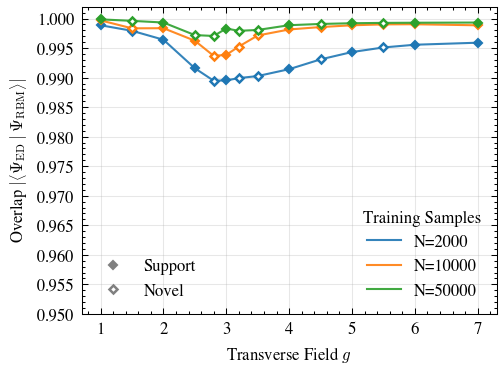

In [11]:
# =========================
# Cell 2 - Overlap vs g
# =========================
SAVE_FIG = True
FILENAME = "tfim_4x4_data_scaling.pdf"
COLUMN_MODE = "single"

XLIM = None
YLIM = (0.95, 1.002)
FIELD_SYMBOL = "g"

MARKER_SIZE_SUPPORT = 3.0
MARKER_SIZE_NOVEL   = 3.0
MARKER_EDGE_NOVEL   = 1.2
MARKER_SHAPE        = "D"

Y_TICK_STEP = 0.005
Y_TICK_FMT  = "%.3f"

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

exp_dir = Path(".")
report_files = sorted(exp_dir.glob("*_report.json"))
if not report_files:
    raise FileNotFoundError(f"No '*_report.json' files found in: {exp_dir.resolve()}")

experiments = []
for fpath in report_files:
    with open(fpath, "r") as f:
        experiments.append(json.load(f))
experiments.sort(key=lambda x: x.get("config", {}).get("n_samples", np.inf))

cmap = plt.get_cmap("tab10")

for i, exp in enumerate(experiments):
    n = exp["config"]["n_samples"]
    df = pd.DataFrame(exp["results"])
    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]
    color = cmap(i % 10)

    ax.plot(
        df["h"], df["overlap"],
        color=color,
        label=f"N={n}",
        linestyle=main_style.get("linestyle", "-"),
        linewidth=main_style.get("linewidth", 1.0),
        alpha=main_style.get("alpha", 0.5),
    )
    ax.plot(
        supp["h"], supp["overlap"],
        linestyle="None", marker=MARKER_SHAPE,
        markersize=MARKER_SIZE_SUPPORT, color=color,
    )
    ax.plot(
        nov["h"], nov["overlap"],
        linestyle="None", marker=MARKER_SHAPE,
        markersize=MARKER_SIZE_NOVEL, color=color,
        markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
    )

ax.set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")
ax.set_ylabel(r"Overlap $\left|\left\langle \Psi_\mathrm{ED}\mid \Psi_\mathrm{RBM}\right\rangle\right|$")

if XLIM is not None:
    ax.set_xlim(*XLIM)
if YLIM is not None:
    ax.set_ylim(*YLIM)

ax.yaxis.set_major_locator(mticker.MultipleLocator(Y_TICK_STEP))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter(Y_TICK_FMT))

leg_samples = ax.legend(loc="lower right", title="Training Samples", frameon=False)

custom_lines = [
    Line2D([0], [0], color="gray", marker=MARKER_SHAPE, linestyle="None",
           label="Support", markersize=MARKER_SIZE_SUPPORT),
    Line2D([0], [0], color="gray", marker=MARKER_SHAPE, markerfacecolor="white",
           markeredgewidth=MARKER_EDGE_NOVEL, linestyle="None",
           label="Novel", markersize=MARKER_SIZE_NOVEL),
]
leg_markers = ax.legend(handles=custom_lines, loc="lower left", frameon=False)
ax.add_artist(leg_samples)

ax.grid(True, alpha=0.3)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

In [3]:
# --- Load Data Plot 1 ---
file_path = Path("tfim_4x4_suscept_rbm_mc_20251216_010908.csv")
ref_file = Path("tfim_4x4_suscept_ref.csv")

if file_path.exists():
    df = pd.read_csv(file_path)
    h_eval = df["h"].values
    chi_values = df["chi_F"].values
else:
    # Dummy data
    h_eval = np.linspace(1, 4, 20)
    chi_values = np.exp(-(h_eval-2.5)**2)

ref_df = pd.read_csv(ref_file) if ref_file.exists() else None
XLIM = (0.95, 4.05)
print("Data for Plot 1 loaded.")

Data for Plot 1 loaded.


Saved: tfim_4x4_susceptibility.pdf


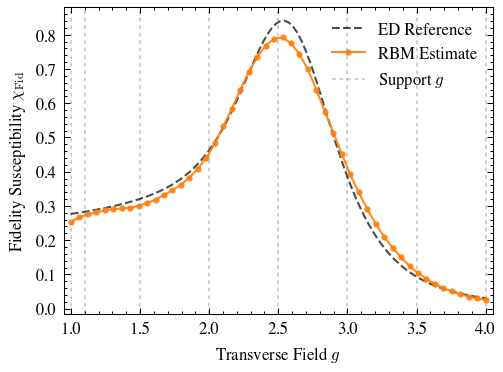

In [10]:
# --- Configuration ---
SAVE_FIG = True
FILENAME = "tfim_4x4_susceptibility.pdf"
COLUMN_MODE = "single"

support_lines = [1.00, 1.10, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75  # standard aspect ratio

plt.figure(figsize=(width, height), dpi=DPI)
ax = plt.gca()

# 1. Reference Curve
if ref_df is not None:
    ax.plot(
        ref_df["h"].values,
        ref_df["chi_F"].values,
        **ref_style
    )

# 2. Main Curve
ax.plot(
    h_eval,
    chi_values,
    label="RBM Estimate",
    **main_style
)

# 3. Support Lines (vertical guides)
for i, g0 in enumerate(support_lines):
    ax.axvline(
        g0,
        linestyle=(0, (2, 2)),
        linewidth=0.9,
        alpha=0.25,
        color="0.2",
        zorder=0,
        label=r"Support $g$" if i == 0 else "_nolegend_"
    )

ax.set_xlabel(r"Transverse Field $g$")
ax.set_ylabel(r"Fidelity Susceptibility $\chi_\mathrm{Fid}$")
ax.set_xlim(*XLIM)
ax.legend(frameon=False)
plt.tight_layout()

# --- Saving ---
if SAVE_FIG:
    plt.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()


In [6]:
SIDE_LENGTH = 4  # <- set this

base = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetizations"
paths = {
    "full":       Path(f"{base}_full.csv"),
    "three_point":Path(f"{base}_three_point.csv"),
    "one_point":  Path(f"{base}_one_point.csv"),
    "ref":        Path(f"{base}_ref.csv"),
}

def _load_csv(p: Path) -> pd.DataFrame:
    if p.exists():
        return pd.read_csv(p)
    print(f"[warn] missing: {p}")
    return None

df_full  = _load_csv(paths["full"])
df_three = _load_csv(paths["three_point"])
df_one   = _load_csv(paths["one_point"])
ref_df   = _load_csv(paths["ref"])

Saved: tfim_4x4_magnetization.pdf


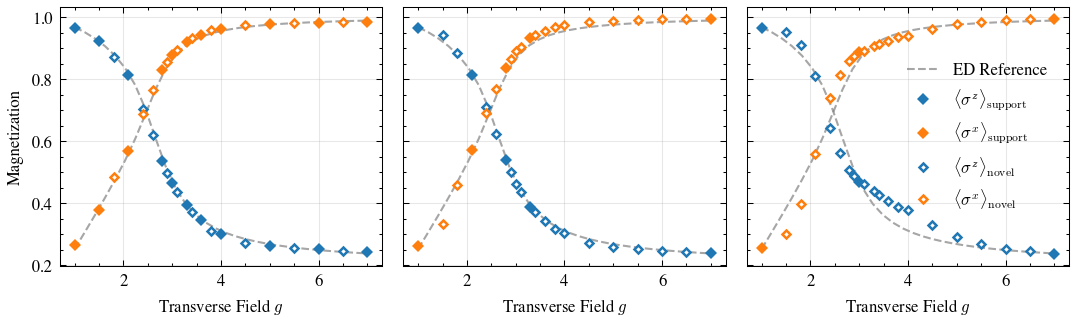

In [11]:
# =========================
# Cell B - Plot magnetizations (3 panels)
# =========================
SAVE_FIG     = True
FILENAME     = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetization.pdf"
COLUMN_MODE  = "double"   # "single" or "double"
FIELD_SYMBOL = "g"        # display as g

# --- Marker knobs (match your overlap-vs-g figure) ---
MARKER_SIZE_SUPPORT = 4.2
MARKER_SIZE_NOVEL   = 3.0
MARKER_EDGE_NOVEL   = 1.2
MARKER_SHAPE        = "D"

# tab10 palette
cmap = plt.get_cmap("tab10")
COLOR_Z = cmap(0)
COLOR_X = cmap(1)

# reference line style (grey dashed)
_ref_style = dict(ref_style)
_ref_style.pop("label", None)
_ref_style["color"] = "gray"

def _plot_panel(ax, df, ref_df):
    if df is None:
        ax.text(0.5, 0.5, "missing data file", ha="center", va="center", transform=ax.transAxes)
        ax.set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")
        ax.grid(True, alpha=0.3)
        return

    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]

    # Reference (ED)
    if ref_df is not None:
        ax.plot(ref_df["h"], ref_df["mag_z"], label="_nolegend_", zorder=1, **_ref_style)
        ax.plot(ref_df["h"], ref_df["mag_x"],
                label=ref_style.get("label", "ED Reference"), zorder=1, **_ref_style)

    # Support (filled diamonds)
    ax.plot(
        supp["h"], supp["mz"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_Z,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0,
        label=r'$\langle \sigma^z \rangle_{\mathrm{support}}$', zorder=2,
    )
    ax.plot(
        supp["h"], supp["mx"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_X,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0,
        label=r'$\langle \sigma^x \rangle_{\mathrm{support}}$', zorder=2,
    )

    # Novel (open diamonds)
    ax.plot(
        nov["h"], nov["mz"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_Z,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
        label=r'$\langle \sigma^z \rangle_{\mathrm{novel}}$', zorder=2,
    )
    ax.plot(
        nov["h"], nov["mx"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_X,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
        label=r'$\langle \sigma^x \rangle_{\mathrm{novel}}$', zorder=2,
    )

    ax.set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")
    ax.grid(True, alpha=0.3)

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.3

fig, axes = plt.subplots(
    1, 3,
    figsize=(width, height),
    dpi=DPI,
    sharey=True,
    gridspec_kw={"wspace": 0.06},
    constrained_layout=True,
)

_plot_panel(axes[0], df_full,  ref_df)
_plot_panel(axes[1], df_three, ref_df)
_plot_panel(axes[2], df_one,   ref_df)

axes[0].set_ylabel("Magnetization")

# one legend, placed at the very right inside the last panel
handles, labels = axes[0].get_legend_handles_labels()
axes[2].legend(handles, labels, loc="center right", bbox_to_anchor=(0.98, 0.50), frameon=False)

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()


In [31]:
# --- Data Config ---
CHAIN_LENGTH = 16
DATA_FILE = Path("tfim_l16_entangle_rbm_20251212_030007.csv")
REF_FILE = Path(f"tfim_{CHAIN_LENGTH}_entropy_ref.csv")

# --- Load & Process ---
if DATA_FILE.exists():
    df_res = pd.read_csv(DATA_FILE)
    ref_df_2 = pd.read_csv(REF_FILE) if REF_FILE.exists() else pd.DataFrame()

    # Pivot for 3D Surface
    pivot_df = df_res.pivot(index="l", columns="h", values="s2")

    # Meshgrid Construction
    h_dense = pivot_df.columns.values.astype(float)
    l_values = pivot_df.index.values.astype(int)
    X_h, Y_l = np.meshgrid(h_dense, l_values)
    Z_s2 = pivot_df.values

    # Find support cuts
    support_h_keys = np.sort(
        df_res[df_res["type"] == "support"]["h"].unique()
    )

    if not ref_df_2.empty:
        ref_df_2["h"] = ref_df_2["h"].astype(float)

    print(f"Data Loaded. Cuts at h={support_h_keys}")
else:
    print("Error: Main data file not found.")
    df_res, pivot_df, X_h, Y_l, Z_s2, support_h_keys = None, None, None, None, None, []
    ref_df_2 = pd.DataFrame()

Data Loaded. Cuts at h=[0.5  0.8  0.95 1.   1.05 1.2  1.5 ]


Saved: tfim_4x4_entropy.pdf


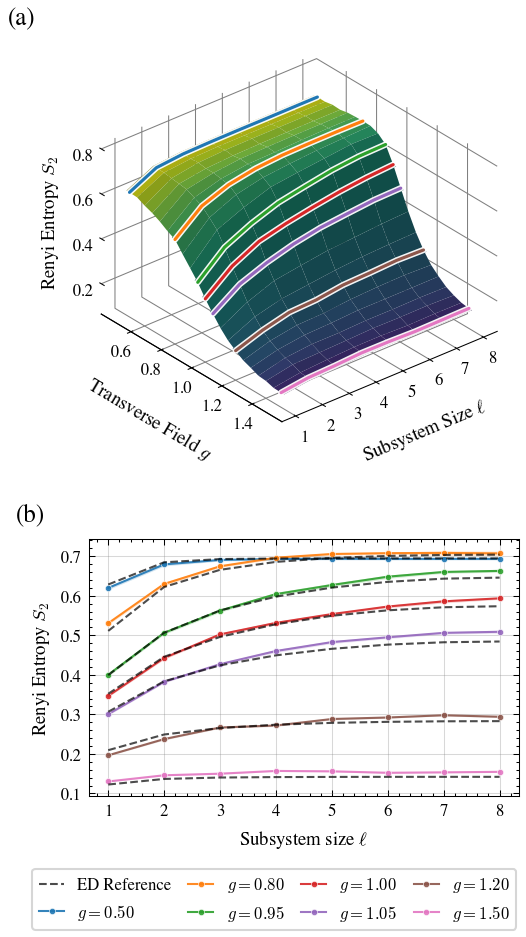

In [32]:
# --- Configuration ---
SAVE_FIG = True
FILENAME = "tfim_4x4_entropy.pdf"
COLUMN_MODE = "single"          # "single" or "double"
SAVE_TIGHT = False              # keep False while tuning

# ==========================================================
# FONT SIZESFont sizes (separate knobs)
# ==========================================================
TEXT_SIZE = 9                   # axis labels + z-label text
TICK_LABEL_SIZE = 8             # tick numbers (2D + 3D)
LEGEND_SIZE = 8                 # legend text (keep like before)
PANEL_LABEL_SIZE = 12           # (a)/(b) (keep like before)

# ==========================================================
# 3D KNOBS
# ==========================================================
THREE_D_RATIO = 2.0
TWO_D_RATIO   = 1.0
PANEL_HSPACE  = 0.10

SHIFT_3D_X = -0.02              # + right, - left

BOX_ASPECT_X = 1.0
BOX_ASPECT_Y = 1.0
BOX_ASPECT_Z = 0.7

XTICK_PAD = -3                  # apply AFTER draw
YTICK_PAD = -3
ZTICK_PAD = -3

X_LABEL_SPACE = 0.0             # smaller -> closer (mplot3d may ignore)
Y_LABEL_SPACE = 0.0
X_LABELPAD = 0                  # points (mplot3d may ignore)
Y_LABELPAD = 0

ZLABEL_X = -0.04                # manual z-label position
ZLABEL_Y = 0.55
ZLABEL_ROT = 90

# ==========================================================
# 2D KNOBS
# ==========================================================
LEGEND_NCOL = 4
LEGEND_ANCHOR = (-0.15, -0.25)  # (x, y) in axes coords
LEGEND_LOC = "upper left"

# ==========================================================
# Figure margins
# ==========================================================
LEFT_MARGIN   = 0.16
RIGHT_MARGIN  = 0.98
TOP_MARGIN    = 0.98
BOTTOM_MARGIN = 0.08

FIELD_SYMBOL = "g"              # display-only symbol (data stays named "h")

def _apply_3d_label_spacing(ax, x_space, y_space, x_pad, y_pad):
    ax.xaxis._axinfo["label"]["space_factor"] = x_space
    ax.yaxis._axinfo["label"]["space_factor"] = y_space
    ax.xaxis.labelpad = x_pad
    ax.yaxis.labelpad = y_pad

with plt.rc_context({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
    "axes.labelsize": TEXT_SIZE,
    "xtick.labelsize": TICK_LABEL_SIZE,
    "ytick.labelsize": TICK_LABEL_SIZE,
    "legend.fontsize": LEGEND_SIZE,
}):
    width = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
    total_height = 6.0 if COLUMN_MODE == "single" else 5.0

    fig = plt.figure(figsize=(width, total_height), dpi=DPI)
    fig.subplots_adjust(left=LEFT_MARGIN, right=RIGHT_MARGIN, top=TOP_MARGIN, bottom=BOTTOM_MARGIN)

    gs = gridspec.GridSpec(
        2, 1,
        height_ratios=[THREE_D_RATIO, TWO_D_RATIO],
        hspace=PANEL_HSPACE
    )

    # ==========================================
    # 1) 3D SURFACE (Top)
    # ==========================================
    ax3d = fig.add_subplot(gs[0], projection="3d")
    ax3d.set_proj_type("ortho")

    pos = ax3d.get_position()
    ax3d.set_position([pos.x0 + SHIFT_3D_X, pos.y0, pos.width, pos.height])

    ax3d.zaxis._axinfo["juggled"] = (1, 0, 2)

    ax3d.minorticks_off()
    ax3d.xaxis.set_minor_locator(ticker.NullLocator())
    ax3d.yaxis.set_minor_locator(ticker.NullLocator())
    ax3d.zaxis.set_minor_locator(ticker.NullLocator())

    ax3d.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax3d.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax3d.zaxis.set_major_locator(ticker.MultipleLocator(0.2))

    ax3d.set_box_aspect((BOX_ASPECT_X, BOX_ASPECT_Y, BOX_ASPECT_Z))

    grid_style = {"color": "gray", "linewidth": 0.5, "alpha": 0.3}
    for axis in (ax3d.xaxis, ax3d.yaxis, ax3d.zaxis):
        axis._axinfo["grid"].update(grid_style)
        axis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    cmap_surface = plt.get_cmap("viridis")
    norm_h = mcolors.Normalize(vmin=h_dense.min(), vmax=h_dense.max())

    t = norm_h(X_h)
    t = 1.0 - t
    t = 0.10 + 0.85 * t
    surface_colors = cmap_surface(t)

    ax3d.plot_surface(
        X_h, Y_l, Z_s2,
        facecolors=surface_colors,
        rstride=1, cstride=1,
        shade=True, linewidth=0, alpha=1.0, antialiased=True
    )

    ax3d.set_zlim(np.min(Z_s2) - 0.05, np.max(Z_s2) + 0.1)

    ax3d.set_xlabel(f"Transverse Field ${FIELD_SYMBOL}$", fontsize=TEXT_SIZE)
    ax3d.set_ylabel("Subsystem Size $\\ell$", fontsize=TEXT_SIZE)

    ax3d.set_zlabel("")
    zlab = ax3d.text2D(
        ZLABEL_X, ZLABEL_Y, "Renyi Entropy $S_2$",
        transform=ax3d.transAxes,
        rotation=ZLABEL_ROT, va="center", ha="right",
        fontsize=TEXT_SIZE,
        clip_on=False
    )

    ax3d.view_init(elev=30, azim=-40)

    _apply_3d_label_spacing(ax3d, X_LABEL_SPACE, Y_LABEL_SPACE, X_LABELPAD, Y_LABELPAD)
    fig.canvas.draw()
    _apply_3d_label_spacing(ax3d, X_LABEL_SPACE, Y_LABEL_SPACE, X_LABELPAD, Y_LABELPAD)
    fig.canvas.draw()

    for tck in ax3d.xaxis.get_major_ticks():
        tck.set_pad(XTICK_PAD)
    for tck in ax3d.yaxis.get_major_ticks():
        tck.set_pad(YTICK_PAD)
    for tck in ax3d.zaxis.get_major_ticks():
        tck.set_pad(ZTICK_PAD)

    for lab in ax3d.get_xticklabels() + ax3d.get_yticklabels() + ax3d.get_zticklabels():
        lab.set_clip_on(False)
        lab.set_fontsize(TICK_LABEL_SIZE)

    fig.canvas.draw()

    ax3d.text2D(-0.1, 1.05, "(a)", transform=ax3d.transAxes,
                fontsize=PANEL_LABEL_SIZE, fontweight="bold", va="top", ha="right")

    # ==========================================
    # 2) 2D CUTS (Bottom)
    # ==========================================
    ax2d = fig.add_subplot(gs[1])

    cmap_2d = plt.get_cmap("tab10")
    ref_label_added = False
    H_RIBBON_PAD = 0.02

    for i, h in enumerate(support_h_keys):
        subset = df_res[df_res["h"] == h].sort_values("l")
        s2_vals = subset["s2"].values
        err_vals = subset["s2_err"].values
        color = cmap_2d(i % 10)
        h0 = float(h)

        h_left  = h0 - H_RIBBON_PAD
        h_right = h0 + H_RIBBON_PAD

        X_rib = np.vstack([
            np.full_like(l_values, h_left, dtype=float),
            np.full_like(l_values, h_right, dtype=float),
        ])
        Y_rib = np.vstack([l_values, l_values])
        Z_rib = np.vstack([s2_vals, s2_vals])

        t0 = 1.0 - norm_h(h0)
        t0 = 0.10 + 0.85 * t0
        rib_color = cmap_surface(t0)

        ax3d.plot_surface(
            X_rib, Y_rib, Z_rib,
            color=rib_color, shade=True, linewidth=0, alpha=1.0, antialiased=True
        )

        xline = np.full_like(l_values, h0, dtype=float)

        ax3d.plot(
            xline, l_values, s2_vals,
            color="white", linestyle="-", linewidth=3.0, alpha=0.95,
            solid_capstyle="round", solid_joinstyle="round", zorder=19
        )
        ax3d.plot(
            xline, l_values, s2_vals,
            color=color, linestyle="-", linewidth=1.5, alpha=1.0,
            solid_capstyle="round", solid_joinstyle="round", zorder=20
        )

        if not ref_df_2.empty:
            mask = np.isclose(ref_df_2["h"].values, h0, atol=1e-6)
            if mask.any():
                row = ref_df_2.loc[mask].iloc[0]
                x_ref, y_ref = [], []
                for c in ref_df_2.columns:
                    if c.startswith("l"):
                        ell = int(c[1:])
                        if ell in l_values:
                            x_ref.append(ell)
                            y_ref.append(row[c])

                lbl = ref_style["label"] if not ref_label_added else "_nolegend_"
                style_kwargs = ref_style.copy()
                style_kwargs["label"] = lbl
                ax2d.plot(x_ref, y_ref, **style_kwargs, zorder=5)
                ref_label_added = True

        ax2d.plot(
            l_values, s2_vals,
            marker="o", linestyle="-", color=color, markersize=3,
            linewidth=1.0, alpha=0.9,
            markeredgecolor="white", markeredgewidth=0.3,
            label=f"${FIELD_SYMBOL}={h0:.2f}$",
            zorder=4
        )
        ax2d.fill_between(
            l_values, s2_vals - err_vals, s2_vals + err_vals,
            color=color, alpha=0.2, linewidth=0
        )

    ax2d.set_xlabel("Subsystem size $\\ell$", fontsize=TEXT_SIZE)
    ax2d.set_ylabel("Renyi Entropy $S_2$", fontsize=TEXT_SIZE)
    ax2d.grid(True, which="major", alpha=0.3, color="gray", linewidth=0.5)

    for lab in ax2d.get_xticklabels() + ax2d.get_yticklabels():
        lab.set_fontsize(TICK_LABEL_SIZE)

    ax2d.text(-0.1, 1.05, "(b)", transform=ax2d.transAxes,
              fontsize=PANEL_LABEL_SIZE, fontweight="bold", va="bottom", ha="right")

    leg = ax2d.legend(
        frameon=True,
        fontsize=LEGEND_SIZE,
        ncol=LEGEND_NCOL,
        loc=LEGEND_LOC,
        bbox_to_anchor=LEGEND_ANCHOR,
        columnspacing=1.0,
        handlelength=1.5
    )

    if SAVE_FIG:
        if SAVE_TIGHT:
            plt.savefig(FILENAME, bbox_inches="tight", pad_inches=0.02, bbox_extra_artists=[zlab, leg])
        else:
            plt.savefig(FILENAME)
        print(f"Saved: {FILENAME}")

    plt.show()
